# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:

- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

<div style="background-color:#fff1e0;">For the record, the updates to this project from when I started a few months ago are incredible. It's now much easier to understand the requirements. Thanks!</div>

<div style="background-color:#fff1e0;">
**Answer:**
<br><br>
Running the simulation out of the box, with no changes to the code, the Smartcab (white car) does not move at all while other vehicles roam the streets. The text at the top of the page confirms this stagnation as it repeatedly flashes 'no action taken' every few seconds. The Smartcab is at a standstill. However, the text at the top of the page also let's me know that A) other cars are moving around the Smartcab and B) the light at which the Smartcab is sitting is changing colors. Although the Smartcab itself is stationary, the environment around the cab is not. 
<br><br>
The text atop the screen gives a little more information -- it references a reward of some type. Despite not yet understanding exactly how the rewards are generated, it's clear that based on the Smartcab action (or inaction) and references to the environment around it (color of the stoplight, state of oncoming traffic) a numerical reward is granted ranging from approximately -6 to +3.
<br><br>
It makes sense that when the light turns red and no action is taken... the reward is positive because cars should stop at red lights. Alternatively, when the light turns green and no action is taken the reward is negative (this depends actually). There appears to be a spectrum upon which the rules and rewards sit since a green light with no action + oncoming traffic results in a positive reward.  
</div>

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

<div style="background-color:#fff1e0;">
**Answer:**
<br><br>
1. agent.py. A) Epsilon - line 155 tells us that we can adjust the epsilon value which will effect the trade-off between exploration and exploitation. A higher epsilon value will encourage the algorithm to explore more frequently... meaning it will be more inclined to ignore what it has already knows and try something new. With more exploration, we can obtain more information, which ulitmately results in A+ driving. B) Deadline - line 162 tells us that we can enfore a deadline for the amount of time Smartcab can have to reach it's destination. Reliability, no doubt, will be measured using this feature. C) Environment - lines 146-148 tell us that we can have a modicum of control over how the envirment operates. For example, grid_size on line 148 allows us to change the size of the street grid. Interestly, a larger grid would 1) increase the time it takes the Smartcab to get to it's destination but 2) increase the amount of learning the Smartcab can do on each iteration. Similarly, we can change the number of cars (dummies) on the grid which I think would allow for increased learning opportunities but reduce the time it takes to reach the destination.
<br><br>
2. environment.py. act is the function that is called when an agent performs an action. It assesses the action as valid/invalid and calculates a reward based on safety and time elapsed. Additionally, it updates agent metrics such as current position (what intersection am I at?), the state of the traffic light, and the next waypoint.
<br><br>
3. simulator.py. The render_text() function prints results in the console updating the user (me) about the state of the Smartcab, it's actions, rewards, etc. and the render() funtion prints results in the visual simulation.
<br><br>
4. planner.py. The next_waypoint() function first checks if the Smartcab is cardinally East or West of location, then check North or South. 
</div>

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time. DONE.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial. DONE.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`. DONE.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials. DONE.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


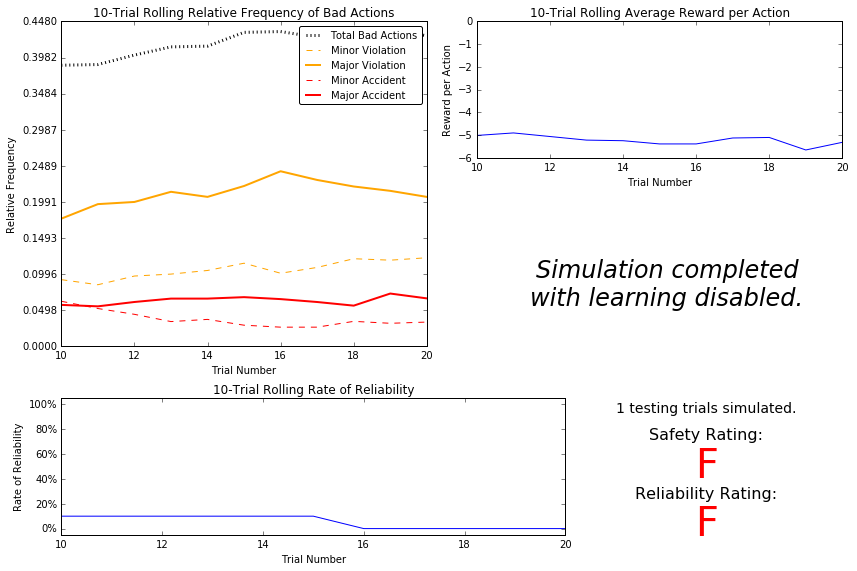

In [15]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

<div style="background-color:#fff1e0;">
**Answer:**
<br><br>
The driving agent at this state is a sheer hazard to everyone and everything on the road, including itself. Depending on the trial, roughly 40-45% of the driving agent's decisions result in negative consequences and approximately 5% of decisions result in a major accident. The most frequent type of result coming from a bad decision is a major violation. Logically, it follows that the "10-trial Rolling Average Reward per Action" chart shows that the average reward in these 10 trials is negative. We saw earlier in observing the visual simulations that the harshest "reward" would be somewhere around -6 and the line in the rolling average reward chart hovers between -5 and -6. It follows that the rate of reliability is quite low... with the rolling average through the ten trials starting at 10% and ultimately falling to 0%.
<br><br>
As the number of trials increases, does the outcome of results change significantly? Signficance is subjective here, I think, but I would argue there is a slight deterioration in performance of the Smartcab as the number of trials increases. The occurance of bad actions rises, the average reward falls slowly, and the reliability metric drops from 10% to 0%. Moreover, our scorecard performance is F/F. It's unfortunate that through all these trials, the Smartcab agent is not learning how to drive and in fact appears to be getting worse.
<br><br>
According to the NHTSA in the US, the injury rate nationally for folks riding in motor vehicles is less than 1%&#42;. If our Smartcab is crashing in some way, shape or form more than 10% of the time... this certainly can't be considered safe. To make those odds of getting injured even worse, it's quite likely that you won't reach your destination on time either. If we want self driving cars to have a place in our world, we need to teach them to drive more safely and reliably.
<br><br>
&#42; https://crashstats.nhtsa.dot.gov/#/
</div>

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

<div style="background-color:#fff1e0;">
**Answer:**
<br><br>
At this point, I argue that all available features are critical for the driving agent to learn both safety and efficiency. In order for the agent to stay crash free, it needs to understand how to behave when it approaches a traffic light. If it's red, stop. If it's red, stop... unless there are no approaching vehicles in which case you can make a right hand turn. If it's green, go... unless you are turning left and there is an oncoming vehicle. We need these inputs (and a resulting reward when action taken is positive) in order to learn the safest course of action.
<br><br>
Similarly, the driving agent needs to be aware of the time elapsed, the goal time to reach the destination, and the shortest route to reach the destination. Each of those first two components is summarized in the deadline metric and the latter component dictated by the waypoint metric.
<br><br>
In order for our Smartcab to learn the safest and most efficient driving methods, I beleive all features are required.
</div>

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

<div style="background-color:#fff1e0;">
**Answer:**
<br><br>
Effectively, there are 6 features -- waypoint, input light, input left, input right, input oncoming, and deadline. Each of these features has a different number of possible states.
<br><br>
Waypoint has 3 options... forward, left, and right. 
Input light has 2 options... red and green (envoronment.py reveals only two choices here... there is no yellow light in the world).
Input left has 4 options... the vehicle to your left can move left, right, or forward. The final combination is that there is no car to your left.  
Input right has 4 options... the vehicle to your right can move left, right, or forward. The final combination is that there is no car to your right.  
Input oncoming has 4 options... the oncoming vehicle can move left, right, or forward. The final combination is that there is no oncoming car.
Deadline has can have numerous options. It will depend on the size of the grid and the starting location. If the grid is small and the starting location is close to the final destination, you may have 1-2 actions remaining. If the grid is small and the starting location is far from the final destination, you could have 10 actions remaining. For our calculations I'll assume 10 actions remaining.
<br><br>
When our smartcab approaches an intersection in this environment it could be confronted with (3*2*4*4*4*10)=3,840 different possible states depending upon how far the driving agent is from the final destination.
</div>

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

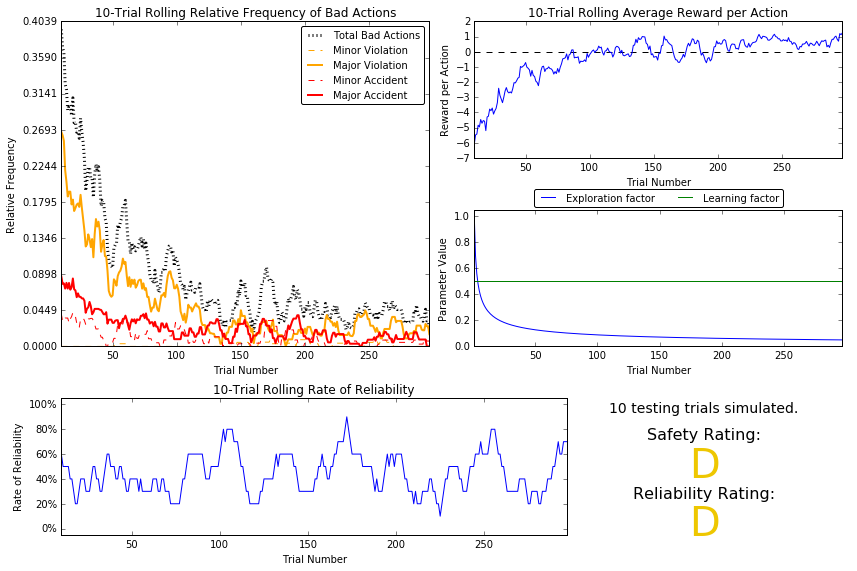

In [16]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

<div style="background-color:#fff1e0;">
**Answer:**
<br><br>
FYI parameters that were set were enforce_deadline=True, update_delay=0.01, display=False, log_metrics=True, and n_test=10.
<br><br>
Well, the major similarity between the basic driving agent and this default Q-Learning agent is the safety and reliability ratings of... poor. Additionally, each line in the the different charts starts (on the left hand side) at about the same spot. For example, in the upper right hand chart showing frequency of bad actions the Total Bad Actions line starts around 40% for both the basic driving agent and this default Q-Learning agent.
<br><br>
296 training trials were done before testing commenced. The epsilon tolerance is set to 0.05.. which means testing will not commence until the epsilon has decayed to this level. If the rate of decay is faster.. you'll reach the threshold faster and have less trials and if the rate of decay is slower.. you'll reach the threshold over a larger number of trials. I experimented a little bit with this. I started with 1/x^(1/1.1) where x is the number of trials and the number of trials before testing kicked in was 25 (solving for x in that equation when y=0.05 is 26.9). Then, I dramatically decreaed the rate of decay with 1/x^1.9 and the number of trails was 296! (solving for x in that equation when y=0.05 is indeed 296.5) Interestingly, the ratings don't get better but the amount of training time is significantly longer. 
<br><br>
I believe the implemented decaying fucntion is accurately represented in the parameters panel, although it is difficult to tell for sure due to the scaling of the chart. Alpha remains at 0.5 for the entire period and that is clear to see. We also see the epsilon (the exploration factor) decreases over the number of trials at an exponential rate (the calculations above confirm the # of trials is accurate). This indicates that as the number of trials increases the algorithm becomes more inclined to exploit its current knowledge rather than explore unknown possibilities.
<br><br>
As the number of trials increased the number of bad actions, as mentioned above, definitely decreased and the average reward received does increase. The machine is learning! However, after the trials end, the rate of bad actions is still high and the average reward received is still low compared to the top of our reward range of 3. We need to learn more or we need to learn faster.
<br><br>
The initial driving agent and this default Q-Learning agent received a safety and reliability rating of F and D respectively. When I increased the number of training trials to 296, the ratings do not improve dramatically.
</div>

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

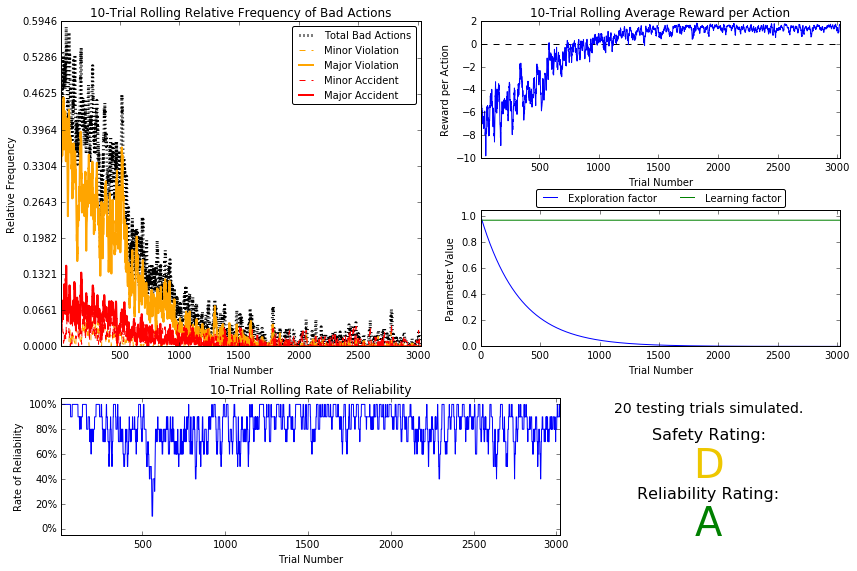

In [2]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

<div style="background-color:#fff1e0;">
**Answer:**
1) {ϵ=a^t, for 0 less than a less than 1} is the decay function I used for epsilon. After many many simulations, this one gave the best results. I also decayed the learning rate over time with the same function.
<br><br>
2) In the final model, about 3000 training trials were needed before testing began. Admittedly, I can probably acheive the same saftey and reliability scores with far fewer trials. Recommendations are welcome here :)
<br><br>
3) First, epsilon tolerance rate. I used 0.00001 (which is much smaller than the default 0.05) because it allowed the agent to run more trials before testing began. I used a learning rate of 0.97 to maximize the information the agent was learning. 
<br><br>
4) The previous agent scored D and D for safety and reliability. Although there was no improvement in the safety rating, the agent received a score of A for reliability.
<br><br>
5) I was hoping to acheive at least a 1% total bad actions rate. Alas, I've settled for one in the 5% range. At least we reach our destination on time.
<br><br>
6) I am not satisfied. However, I am mentally exhausted from running this simulator over and over. I've thoguht through the workings of the algorithm and can't bring the scores where I want them. I'm eager to hear feedback from the code reviewer. Something that confused me was this action and reward... Agent drove left instead of forward. (rewarded 1.39)... why would the agent get a positive reward for turning the wrong way?
</div>

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

<div style="background-color:#fff1e0;">
**Answer:** 

The states are based on the path to the destination, the state of the traffic light (red or green), and the status of traffic at the intersection (is there another vehicle to your left, right, or straight ahead?). Here are 3 examples of optimal policy in this model.<br><br>
1. When traffic lights are red, we stop at them. Unless, however, they are red and there is no oncoming traffic or traffic coming from the left... in that case (so long we are not in NYC it's OK to turn right). The optimal policy is to stop at red light, but make a right if there are no other vehicles at the intersection.<br>
2. A vehicle could be moving toward our vehicle (oncoming) and if the light is green that oncoming vehicle should not deter me from driving forward or making a right hand turn. It should, however, deter me from making a left hand turn since we'd collide. The optimal policy is make stop at a green light if there is an oncoming car approaching.<br>
3. We are not the only agent that doesn't follow all the rules. I imagine that if we have a green light and the vehicle to our right is turning right (even when they have a red light), our agent should stop.
<br><br>
Now, let's see if our model follows what I would consider optimal policy.
<br><br>
1. Ahh. The first set of instructions in the log file show an instance where the light is red and there is a vehicle coming from the left that is going forward (rightredforwardNoneforward). In this instance, definitely stop at the red light. Alas, a strong negative reward is associated with turning right. A small positive reward is associated with doing nothing (as it should but I would think the reward would be bigger given the magnitude of the penalty for taking action). Another instruction (forwardredNoneNoneNone) shows that our agent has not learned how to turn right on red when there are no other vehicles at the intersection.<br>
2. In this second scenario, I want to turn left but there is an oncoming car going straight (leftgreenNoneNoneforward). The reward for idling is negative... which does not make sense. The reward for going right is positive, albeit very small. The proper reward system would be positive for idling and negative for turning right.<br>
3. In this case (forwardgreenNonerightforward), we get a penalty for going forward which is good. However, we also get a penalty for remaining idle which would be the appropriate action. 
</div>

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.